In [32]:
# importing libraries

import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [33]:
import warnings
warnings.filterwarnings("ignore")

In [34]:
# reading the data

boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'

boston_df = pd.read_csv(boston_url)

boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [ ]:
# discovering data with .info and .describe commands

In [35]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [36]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


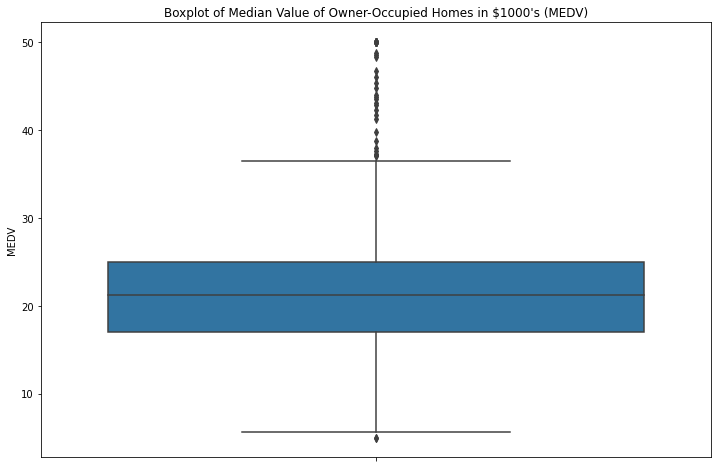

In [37]:
# For the "Median value of owner-occupied homes" provide a boxplot

plt.figure(figsize=(12,8))

sns.boxplot(y="MEDV", data=boston_df)

plt.title("Boxplot of Median Value of Owner-Occupied Homes in $1000's (MEDV)")
plt.show()

In [ ]:
# The mean and median values are at around 22
# There are outliers above third quartile

  Dummy Variable  Number
0              0     471
1              1      35


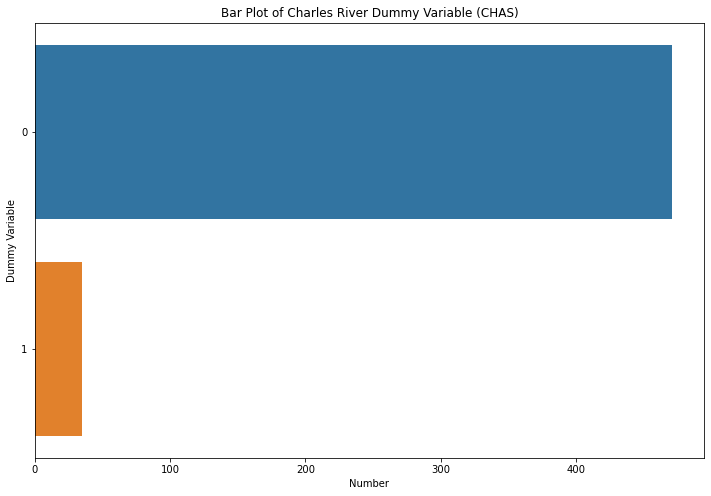

In [50]:
# Provide a  bar plot for the Charles river variable

CHAS_df = pd.DataFrame({"Dummy Variable": ["0", "1"], 
                        "Number": [boston_df['CHAS'].value_counts()[0], boston_df['CHAS'].value_counts()[1]]})
print(CHAS_df)

plt.figure(figsize=(12,8))

sns.barplot(x="Number", y="Dummy Variable", data=CHAS_df)

plt.title("Bar Plot of Charles River Dummy Variable (CHAS)")
plt.show()

In [51]:
# 471 tracts (most of the tracts) do not bound Charles River

In [54]:
# (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

boston_df.loc[(boston_df["AGE"] <= 35),"AGE_GROUP"] = '35 years and younger'
boston_df.loc[(boston_df["AGE"] > 35) & (boston_df["AGE"]<70),"AGE_GROUP"] = 'between 35 and 70 years'
boston_df.loc[(boston_df["AGE"] >= 70),"AGE_GROUP"] = '70 years and older'

boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_GROUP
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4,between 35 and 70 years
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6,70 years and older
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9,70 years and older
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0,70 years and older


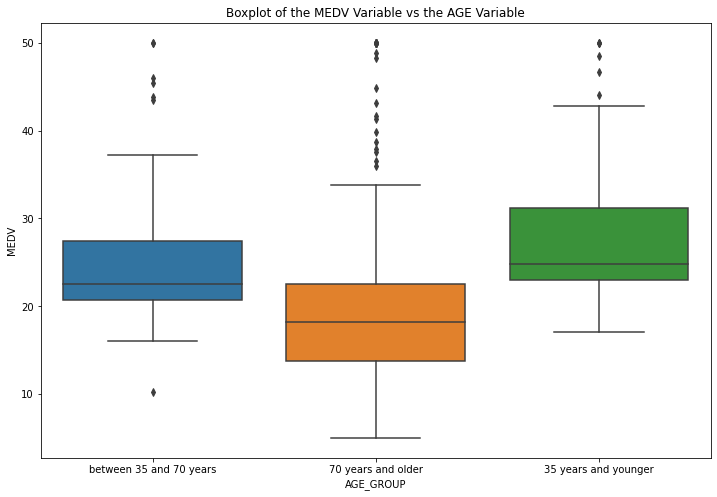

In [55]:
# Provide a boxplot for the MEDV variable vs the AGE variable. 

plt.figure(figsize=(12,8))

sns.boxplot(y="MEDV", x="AGE_GROUP", data=boston_df)

plt.title('Boxplot of the MEDV Variable vs the AGE Variable')
plt.show()

In [ ]:
# The group of 35 years and younger pays the highest median house price
# The group of 70 years and older pays the lowest median house price

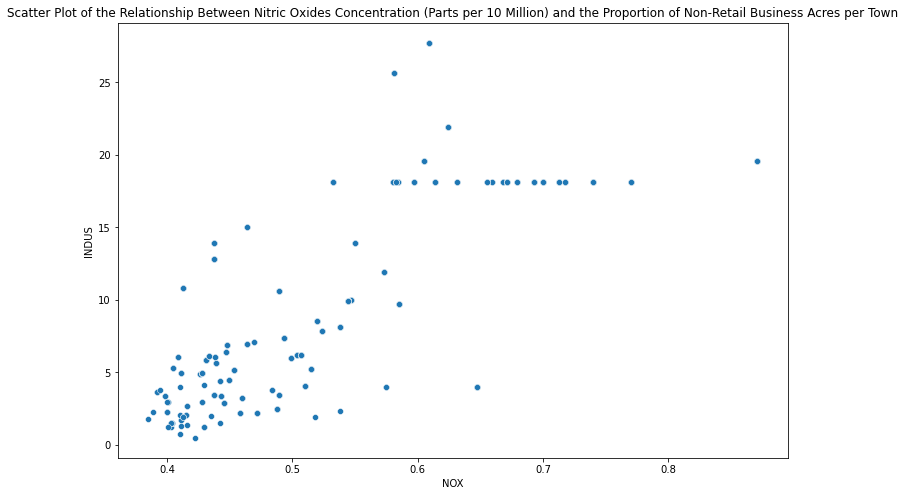

In [42]:
# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

plt.figure(figsize=(12,8))

sns.scatterplot(y="INDUS", x="NOX", data=boston_df)

plt.title('Scatter Plot of the Relationship Between Nitric Oxides Concentration (Parts per 10 Million) and the Proportion of Non-Retail Business Acres per Town')
plt.show()

In [ ]:
# There might be a linear relationship

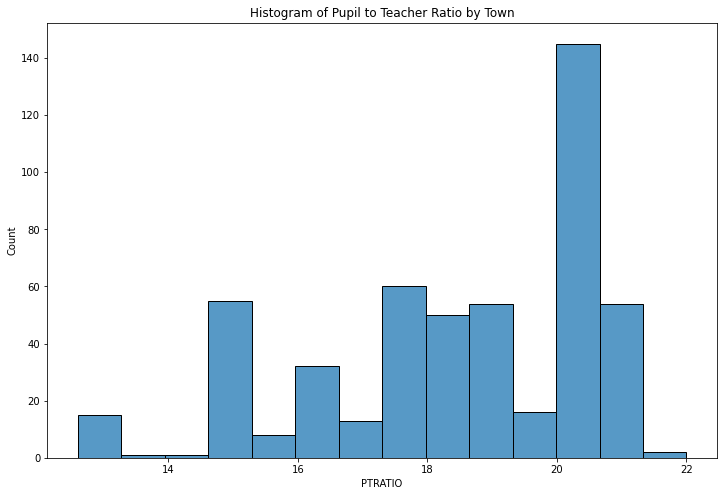

In [43]:
# Create a histogram for the pupil to teacher ratio variable

plt.figure(figsize=(12,8))

sns.histplot(x="PTRATIO", data=boston_df)

plt.title('Histogram of Pupil to Teacher Ratio by Town')
plt.show()

In [ ]:
# Pupil to teacher ratio is the highest at 20-21
# It is a skewed-left distribution

In [44]:
# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

# Null Hypothesis (H0) : There is no difference of MEDV between houses bounded by the Charles river or not
# Alternative Hypothesis(H1): There is a difference of MEDV between houses bounded by the Charles river or not

scipy.stats.ttest_ind(boston_df[boston_df["CHAS"]==0]["MEDV"],
                      boston_df[boston_df["CHAS"]==1]["MEDV"], 
                      equal_var = True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

In [ ]:
# Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference

In [45]:
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

# Null Hypothesis (H0) : The three population means are equal
# Alternative Hypothesis(H1): At least one of the means differ

thirtyfive_lower = boston_df[boston_df["AGE_GROUP"] == '35 years and younger']["MEDV"]
thirtyfive_seventy = boston_df[boston_df["AGE_GROUP"] == 'between 35 and 70 years']["MEDV"]
seventy_older = boston_df[boston_df["AGE_GROUP"] == '70 years and older']["MEDV"]

f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic, p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


In [ ]:
# Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.

In [46]:
# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

# Null Hypothesis (H0) : Nitric oxide concentrations is not correlated with proportion of non-retail business acres per town
# Alternative Hypothesis(H1): Nitric oxide concentrations is correlated with proportion of non-retail business acres per town

pearson, p_value = scipy.stats.pearsonr(boston_df["NOX"], boston_df["INDUS"])

print("Pearson Coefficient value={0}, P-value={1}".format(pearson, p_value))

Pearson Coefficient value=0.7636514469209151, P-value=7.913361061238693e-98


In [ ]:
# Since the p-value is less than 0.05, we reject the Null hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

In [47]:
# What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

# Null Hypothesis (H0) : B1=0 (additional weighted distance to the five Boston employment centres has no effect on the median value of owner occupied homes)
# Alternative Hypothesis(H1): B1=!0 (additional weighted distance to the five Boston employment centres has effect on the median value of owner occupied homes)

x = boston_df['DIS']
y = boston_df['MEDV']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           1.21e-08
Time:                        19:29:52   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Like the t-test, the p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that there is a difference